![](escudo.png)
    
# Analisis masivos de datos
## Visualización avanzada de datos
### Jose Gabriel Rodriguez Rivas
### Jorge Alberto Hernabdez

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
conn =sqlite3.connect('InternetSpeed.db')
cur= conn.cursor()

In [3]:
query='SELECT * from average_speed'
df= pd.read_sql(query,conn)
df.head()

,index,Area,Ping_promedio,Descarga_promedio,Carga_promedio
0,0,E06000049,57.118931,23.482727,9.389337
1,1,E07000192,52.211869,20.804882,8.344268
2,2,E08000005,54.087219,22.189738,8.778285
3,3,E06000018,55.543339,23.018471,9.146285
4,4,E07000088,52.159555,20.821356,8.316713


In [4]:
df.drop('index', inplace = True, axis=1)
df.shape

(326, 4)

In [5]:
la_json=pd.read_json('LA_poligons.json')
la_json.head()

,LA_code,geometry
0,E06000001,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
1,E06000002,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
2,E06000003,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
3,E06000004,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
4,E06000005,"{u'type': u'Polygon', u'coordinates': [[[-1.63..."


In [6]:
df_promedio =df[['Area',  'Ping_promedio']]
df_promedio =df_promedio.rename(columns ={'Area':'LA_code'})
df_promedio.head()

,LA_code,Ping_promedio
0,E06000049,57.118931
1,E07000192,52.211869
2,E08000005,54.087219
3,E06000018,55.543339
4,E07000088,52.159555


In [7]:
print(df_promedio.Ping_promedio.min())
print(df_promedio.Ping_promedio.max())

0.0
70.19295547285596


In [9]:
np.arange(1,12,(12-1)/6)
bins = np.arange(df_promedio.Ping_promedio.min(), df_promedio.Ping_promedio.max(),
                (df_promedio.Ping_promedio.max()-df_promedio.Ping_promedio.min())/6)
bins =list(bins)
print(bins)

[0.0, 11.69882591214266, 23.39765182428532, 35.09647773642798, 46.79530364857064, 58.4941295607133]


#### importamos el archivo folium_utils como libreria para poder trabajar 

In [11]:
#Marca error en la linea de cogido en base a un dato capturado de forma erronea
import folium_utils
mymap = folium_utils.folium_top_x_preds_mapper(df_promedio,la_json,'LA_code',
                                               'Ping_promedio',bins)

SyntaxError: invalid syntax (folium_utils.py, line 82)

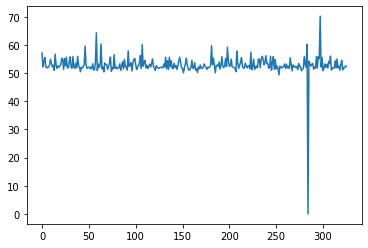

In [12]:
#graficar datos para detectar la anomalia
df_promedio.Ping_promedio.plot()

In [13]:
#Se busca la anomalia para saber cual es el dato erroneo
df_promedio[df_promedio.Ping_promedio==0]

,LA_code,Ping_promedio
284,DateTime,0.0


In [14]:
#se desecha el dato que esta erroneo
df_promedio.drop(284,inplace=True)

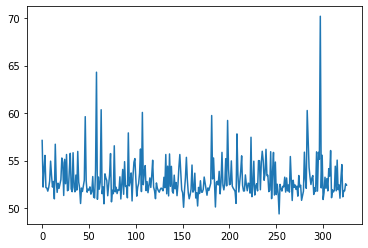

In [15]:
#se vuelve a graficar para saber si esque se soluciono 
df_promedio.Ping_promedio.plot()

In [17]:
import folium_utils
mymap = folium_utils.folium_top_x_preds_mapper(df_promedio,la_json,'LA_code',
                                               'Ping_promedio',bins)

SyntaxError: invalid syntax (folium_utils.py, line 82)